In [62]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.api import VAR

In [63]:
# Step 1: Load and clean the dat
data = pd.read_excel("/content/pinksheet.xlsx", sheet_name='Monthly Prices', skiprows=6)

In [64]:
# Display the first few coloumn of the cleaned data
print(data.columns)

Index(['Unnamed: 0', 'CRUDE_PETRO', 'CRUDE_BRENT', 'CRUDE_DUBAI', 'CRUDE_WTI',
       'COAL_AUS', 'COAL_SAFRICA', 'NGAS_US', 'NGAS_EUR', 'NGAS_JP', 'iNATGAS',
       'COCOA', 'COFFEE_ARABIC', 'COFFEE_ROBUS', 'TEA_AVG', 'TEA_COLOMBO',
       'TEA_KOLKATA', 'TEA_MOMBASA', 'COCONUT_OIL', 'GRNUT', 'FISH_MEAL',
       'GRNUT_OIL', 'PALM_OIL', 'PLMKRNL_OIL', 'SOYBEANS', 'SOYBEAN_OIL',
       'SOYBEAN_MEAL', 'RAPESEED_OIL', 'SUNFLOWER_OIL', 'BARLEY', 'MAIZE',
       'SORGHUM', 'RICE_05', 'RICE_25', 'RICE_A1', 'RICE_05_VNM',
       'WHEAT_US_SRW', 'WHEAT_US_HRW', 'BANANA_EU', 'BANANA_US', 'ORANGE',
       'BEEF', 'CHICKEN', 'LAMB', 'SHRIMP_MEX', 'SUGAR_EU', 'SUGAR_US',
       'SUGAR_WLD', 'TOBAC_US', 'LOGS_CMR', 'LOGS_MYS', 'SAWNWD_CMR',
       'SAWNWD_MYS', 'PLYWOOD', 'COTTON_A_INDX', 'RUBBER_TSR20',
       'RUBBER1_MYSG', 'PHOSROCK', 'DAP', 'TSP', 'UREA_EE_BULK', 'POTASH',
       'ALUMINUM', 'IRON_ORE', 'COPPER', 'LEAD', 'Tin', 'NICKEL', 'Zinc',
       'GOLD', 'PLATINUM', 'SILVER'],
      dt

In [65]:
# Step 2: Conduct unit root tests (e.g., ADF test)
from statsmodels.tsa.stattools import adfuller

In [66]:
def adf_test(series, signif=0.05):
    result = adfuller(series, autolag='AIC')
    p_value = result[1]
    return p_value <= signif

In [67]:
# Rename the first column to 'Date' if it isn't already
data.rename(columns={data.columns[0]: 'Date'}, inplace=True)

# Convert 'Date' to datetime format (handling 'YYYYMM' format)
data['Date'] = pd.to_datetime(data['Date'], format='%YM%m')

# Select the columns of interest
columns_of_interest = ['CRUDE_PETRO', 'CRUDE_BRENT', 'SOYBEANS', 'MAIZE', 'GOLD', 'SILVER']
data = data[['Date'] + columns_of_interest]

# Set 'Date' as the index
data.set_index('Date', inplace=True)

In [68]:
# Display the first few rows of the cleaned data
print(data.head())

            CRUDE_PETRO  CRUDE_BRENT  SOYBEANS  MAIZE   GOLD  SILVER
Date                                                                
1960-01-01         1.63         1.63      94.0   45.0  35.27  0.9137
1960-02-01         1.63         1.63      91.0   44.0  35.27  0.9137
1960-03-01         1.63         1.63      92.0   45.0  35.27  0.9137
1960-04-01         1.63         1.63      93.0   45.0  35.27  0.9137
1960-05-01         1.63         1.63      93.0   48.0  35.27  0.9137


In [69]:
# Step 2: Conduct unit root tests (e.g., ADF test)
from statsmodels.tsa.stattools import adfuller

In [70]:
def adf_test(series, signif=0.05):
    result = adfuller(series, autolag='AIC')
    p_value = result[1]
    return p_value <= signif

In [71]:
# Check for stationarity
stationarity_results = {col: adf_test(data[col]) for col in columns_of_interest}
print("Stationarity Results:", stationarity_results)

Stationarity Results: {'CRUDE_PETRO': False, 'CRUDE_BRENT': False, 'SOYBEANS': False, 'MAIZE': False, 'GOLD': False, 'SILVER': False}


In [72]:
# Step 3: If data is non-stationary, test for cointegration
non_stationary_cols = [col for col, is_stationary in stationarity_results.items() if not is_stationary]

In [73]:
if non_stationary_cols:
    # Differencing the data to make it stationary
    data_diff = data[non_stationary_cols].diff().dropna()

In [74]:
    # Test for cointegration using Johansen's test
    coint_test = coint_johansen(data_diff, det_order=0, k_ar_diff=1)
    print("Johansen's Test Results:", coint_test.lr1)


Johansen's Test Results: [1911.9677133  1421.20902892 1043.80346998  709.63326538  435.40539732
  193.25202297]


In [75]:
import matplotlib.pyplot as plt

Johansen's Test Results: [1911.9677133  1421.20902892 1043.80346998  709.63326538  435.40539732
  193.25202297]
Critical Values: [[ 91.109   95.7542 104.9637]
 [ 65.8202  69.8189  77.8202]
 [ 44.4929  47.8545  54.6815]
 [ 27.0669  29.7961  35.4628]
 [ 13.4294  15.4943  19.9349]
 [  2.7055   3.8415   6.6349]]
Number of Cointegrating Relationships: 6


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Det. terms outside the coint. relation & lagged endog. parameters for equation CRUDE_PETRO
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
L1.CRUDE_PETRO     0.5199      0.239      2.172      0.030       0.051       0.989
L1.CRUDE_BRENT    -0.1562      0.231     -0.678      0.498      -0.608       0.296
L1.SOYBEANS        0.0045      0.007      0.618      0.537      -0.010       0.019
L1.MAIZE           0.0228      0.016      1.458      0.145      -0.008       0.053
L1.GOLD           -0.0017      0.006     -0.299      0.765      -0.013       0.010
L1.SILVER         -0.1327      0.142     -0.934      0.350      -0.411       0.146
Det. terms outside the coint. relation & lagged endog. parameters for equation CRUDE_BRENT
                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

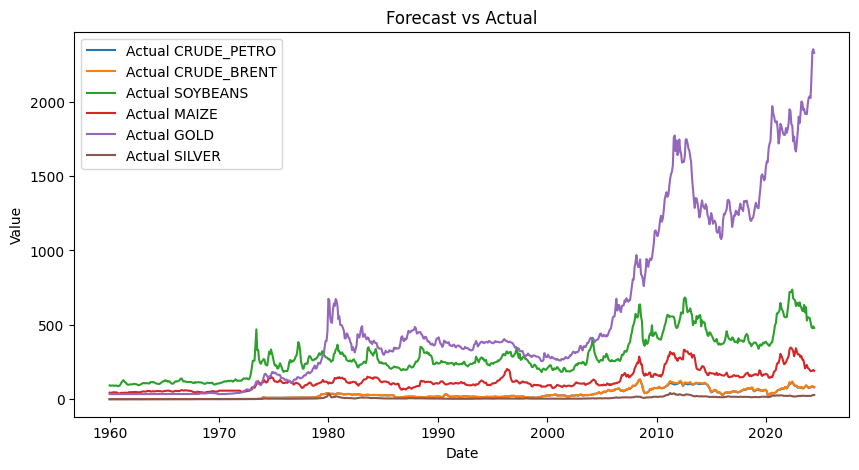

In [76]:
if non_stationary_cols:
    # Differencing the data to make it stationary
    data_diff = data[non_stationary_cols].diff().dropna()

    # Test for cointegration using Johansen's test
    coint_test = coint_johansen(data_diff, det_order=0, k_ar_diff=1)
    print("Johansen's Test Results:", coint_test.lr1)
    print("Critical Values:", coint_test.cvt)

    # Determine the number of cointegrating relationships
    r = np.sum(coint_test.lr1 > coint_test.cvt[:, 1])
    print(f"Number of Cointegrating Relationships: {r}")

    if r > 0:
        # If cointegration exists, estimate the VECM model
        vecm_model = VECM(data[non_stationary_cols], k_ar_diff=1, coint_rank=r)
        vecm_fit = vecm_model.fit()
        print(vecm_fit.summary())

        # Creating a VAR model for prediction using the VECM
        vecm_pred = vecm_fit

        # Forecasting using the VECM model
        # Forecasting 24 steps ahead
        forecast = vecm_pred.predict(steps=24)

        # Plotting the forecast
        plt.figure(figsize=(10, 5))
        for i, col in enumerate(non_stationary_cols):
            plt.plot(data.index, data[col], label=f'Actual {col}')
        plt.legend()
        plt.title('Forecast vs Actual')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.show()
    else:
        # If no cointegration exists, proceed with Unrestricted VAR Analysis
        model = VAR(data_diff)
        var_fit = model.fit(maxlags=15, ic='aic')
        print(var_fit.summary())

        # Granger causality test
        for col in non_stationary_cols:
            causality_results = var_fit.test_causality(col, [c for c in non_stationary_cols if c != col], kind='f')
            print(f"Granger Causality Test Results for {col}:", causality_results.summary())

        # Forecasting using the VAR model
        forecast = var_fit.forecast(data_diff.values[-var_fit.k_ar:], steps=24)
        forecast_index = pd.date_range(start=data_diff.index[-1], periods=24, freq='M')

        # Create a DataFrame for the forecast
        forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=non_stationary_cols)

        # Plotting the forecast
        plt.figure(figsize=(10, 5))
        for col in non_stationary_cols:
            plt.plot(data_diff.index, data_diff[col], label=f'Actual {col}')
            plt.plot(forecast_df.index, forecast_df[col], label=f'Forecast {col}', linestyle='--')
        plt.legend()
        plt.title('Forecast vs Actual')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.show()
else:
    print("All selected columns are stationary.")